# Particle Tracking in the Ocean

See the [IndividualDisplacements.jl](https://juliaclimate.github.io/IndividualDisplacements.jl/dev/) package docs that provides many examples. In the one used here, we focus on the three Dimensional Ocean Circulation and use the ([OCCA1](https://doi.org/10.1175/2009JPO4043.1) ocean state estimate. 

The calculation advects particles with the climatological mean flow in three dimensions starting from a selected depth level (e.g. `k=10` for 95 m) and region using a near-global ocean state estimate ([OCCA](https://doi.org/10.1175/2009JPO4043.1) which is here repeated for two years. For additional documentation e.g. see : [1](https://JuliaClimate.github.io/MeshArrays.jl/dev/), [2](https://JuliaClimate.github.io/IndividualDisplacements.jl/dev/), [3](https://docs.juliadiffeq.org/latest/solvers/ode_solve.html), [4](https://en.wikipedia.org/wiki/Displacement_(vector))

_note : you can also use MITgcm/pkg/flt to do this._

## Setup Julia

In [6]:
#Let's start a temporary environment for this notebook, and add julia packages that we will use
if !isdefined(Main,:IndividualDisplacements)
    using Pkg; Pkg.activate(temp=true)
    Pkg.add.(["IndividualDisplacements", "CairoMakie", "Climatology", "NetCDF"])
 
    using IndividualDisplacements, CairoMakie, Climatology, NetCDF
	p0=joinpath(dirname(pathof(IndividualDisplacements)),"..","examples")
	f0=joinpath(p0,"worldwide","OCCA_FlowFields.jl")
	include(f0);
end

## Setup Calculation

In [2]:
𝑃,𝐷=OCCA_FlowFields.setup(nmax=5);

In [3]:
#Initial Conditions (positions) :
nf=1000; lo=(-160.0,-150.0); la=(30.0,40.0); level=2.5;
df=OCCA_FlowFields.initial_positions(𝐷.Γ, nf, lo, la, level)

#Individuals data structure :
𝐼=Individuals(𝑃,df.x,df.y,df.z,df.f,
    (🔴=OCCA_FlowFields.custom🔴,🔧=OCCA_FlowFields.custom🔧, 𝐷=𝐷))

  📌 details     = (1, 1000) Vector{Float64}
  🔴 details     = (0, 14) ["ID", "fid", "x", "y", "k", "z", "iso", "t", "lon", "lat", "dlon", "dlat", "year", "col"]
  🆔 range       = (1, 1000)
  🚄 function    = dxdt!
  ∫  function    = ensemble_solver
  🔧 function    = custom🔧
  𝑃  details     = (:u0, :u1, :v0, :v1, :w0, :w1, :𝑇, :update_location!)


## Compute Displacements

Here we integrate over 10 days.

In [4]:
𝑇=(0.0,10*86400.0)
∫!(𝐼,𝑇);

## Visualize Displacements

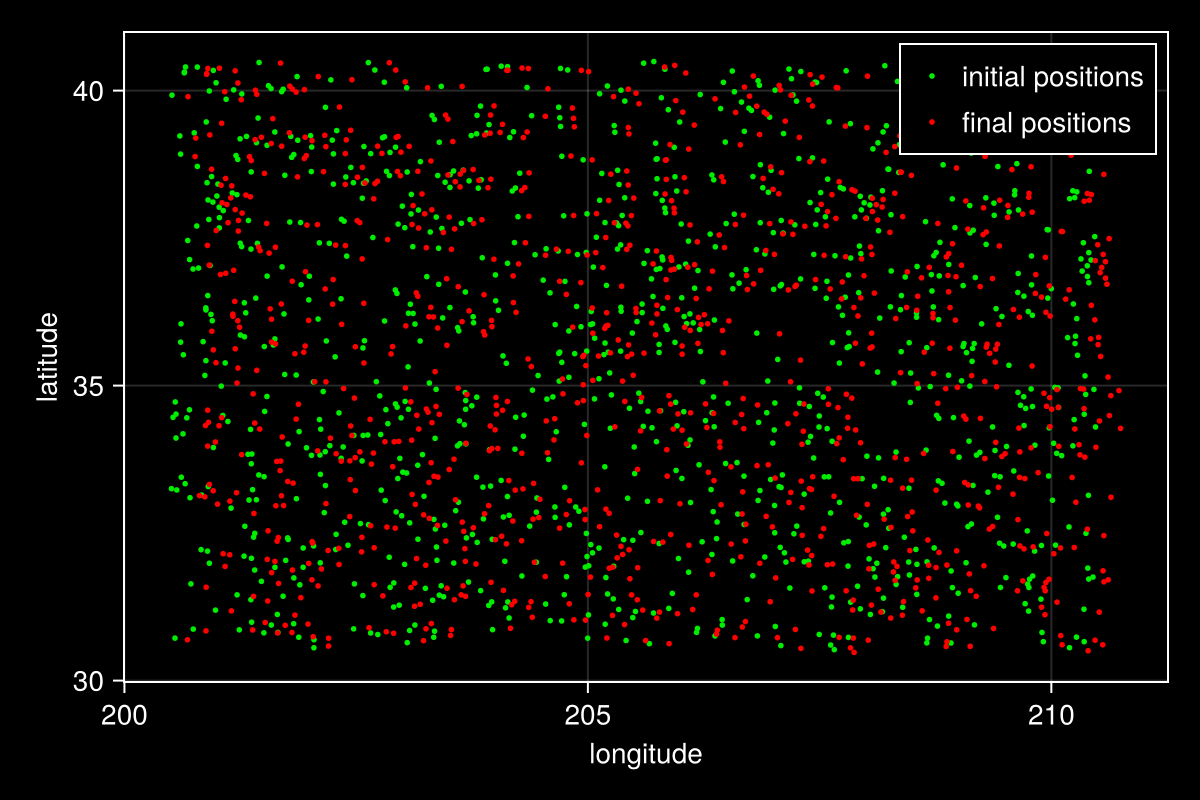

In [5]:
"""
    myplot(𝐼::Individuals)

Plot the initial and final positions as scatter plot in `lon,lat` or `x,y` plane.
"""
function myplot(𝐼::Individuals)
	🔴_by_t = IndividualDisplacements.DataFrames.groupby(𝐼.🔴, :t)
	set_theme!(theme_black())
	fig=Figure(size = (600, 400))
    a = Axis(fig[1, 1],xlabel="longitude",ylabel="latitude")		
    scatter!(a,🔴_by_t[1].lon,🔴_by_t[1].lat,color=:green2,markersize=4,label="initial positions")
    scatter!(a,🔴_by_t[end].lon,🔴_by_t[end].lat,color=:red,markersize=4,label="final positions")
    axislegend(a)
    return fig
end

myplot(𝐼)